<a href="https://colab.research.google.com/github/ganeshghadge2772/Google-Brain-Ventilator-Pressure-Prediction/blob/main/google_brain_ventilator_pressure_prediction_kagg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle competitions download -c ventilator-pressure-prediction

 97% 217M/223M [00:04<00:00, 37.2MB/s]
100% 223M/223M [00:04<00:00, 47.7MB/s]


In [49]:
import zipfile
 
zip_file = "/content/ventilator-pressure-prediction.zip"
 
try:
    with zipfile.ZipFile(zip_file) as z:
        z.extractall()
        print("Extracted all")
except:
    print("Invalid file")

Extracted all


In [11]:
# importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [12]:
# loading training dataset

train_df = pd.read_csv('/content/train.csv')
train_df

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987
...,...,...,...,...,...,...,...,...
6035995,6035996,125749,50,10,2.504603,1.489714,1,3.869032
6035996,6035997,125749,50,10,2.537961,1.488497,1,3.869032
6035997,6035998,125749,50,10,2.571408,1.558978,1,3.798729
6035998,6035999,125749,50,10,2.604744,1.272663,1,4.079938


In [13]:
# exploring dataframe

train_df.describe()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
count,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06
mean,3.018000e+06,6.283886e+04,2.703618e+01,2.608072e+01,1.307225e+00,7.321615e+00,6.204493e-01,1.122041e+01
std,1.742443e+06,3.633526e+04,1.959549e+01,1.715231e+01,7.659778e-01,1.343470e+01,4.852752e-01,8.109703e+00
min,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-1.895744e+00
25%,1.509001e+06,3.137700e+04,5.000000e+00,1.000000e+01,6.428995e-01,3.936623e-01,0.000000e+00,6.329607e+00
50%,3.018000e+06,6.276550e+04,2.000000e+01,2.000000e+01,1.308123e+00,4.386146e+00,1.000000e+00,7.032628e+00
75%,4.527000e+06,9.430100e+04,5.000000e+01,5.000000e+01,1.965502e+00,4.983895e+00,1.000000e+00,1.364103e+01
max,6.036000e+06,1.257490e+05,5.000000e+01,5.000000e+01,2.937238e+00,1.000000e+02,1.000000e+00,6.482099e+01


In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6036000 entries, 0 to 6035999
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   id         int64  
 1   breath_id  int64  
 2   R          int64  
 3   C          int64  
 4   time_step  float64
 5   u_in       float64
 6   u_out      int64  
 7   pressure   float64
dtypes: float64(3), int64(5)
memory usage: 368.4 MB


In [15]:
# checking null values

train_df.isnull().sum().value_counts

<bound method IndexOpsMixin.value_counts of id           0
breath_id    0
R            0
C            0
time_step    0
u_in         0
u_out        0
pressure     0
dtype: int64>

In [16]:
# checking duplicated values

len(train_df[train_df.duplicated()])

0

In [17]:
train_df['R'].unique()

array([20, 50,  5])

In [18]:
train_df['C'].unique()

array([50, 20, 10])

In [19]:
train_df['u_out'].unique()

array([0, 1])

## EDA

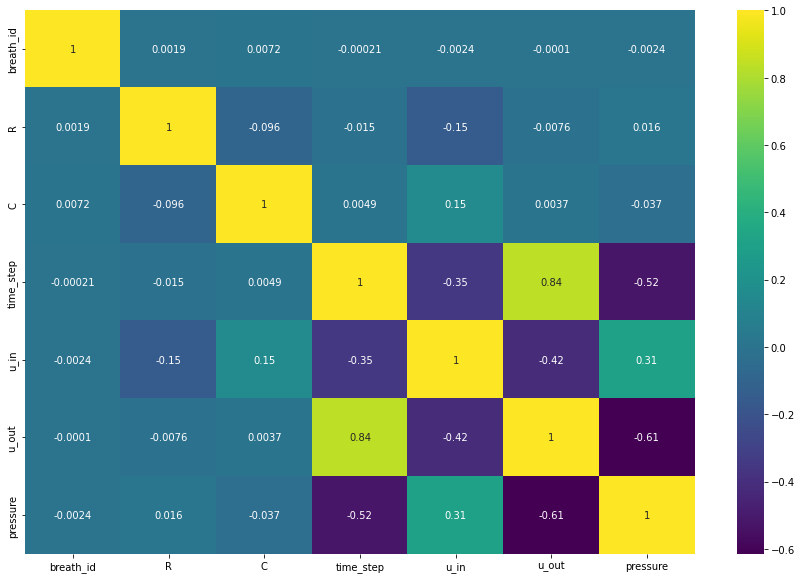

In [20]:
# correlation graph

fig = plt.figure(figsize=[15,10])
sns.heatmap(train_df.drop('id', axis = 1).corr(),annot = True, cmap = 'viridis')

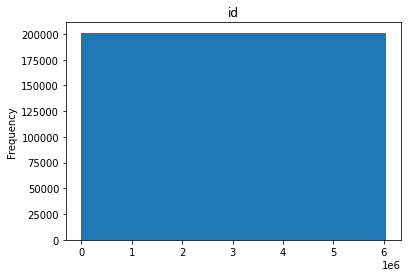

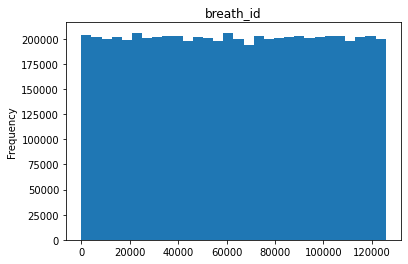

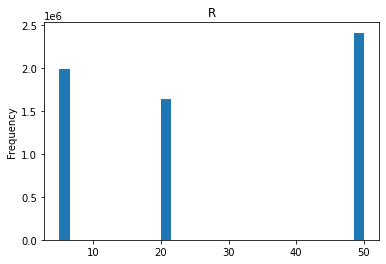

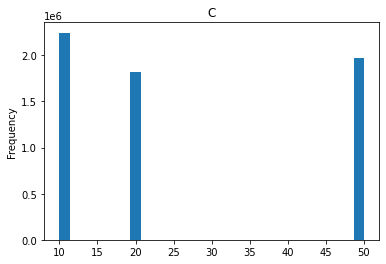

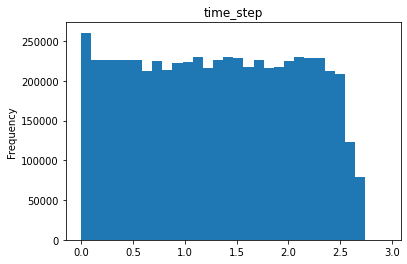

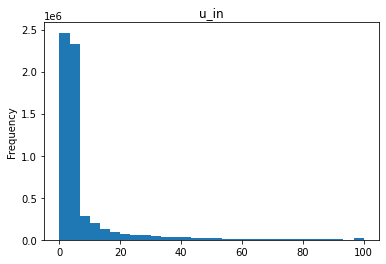

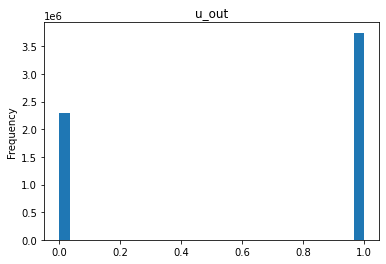

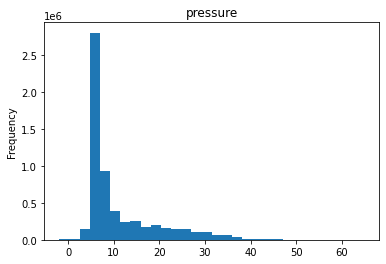

In [21]:
# frequency plots of each feature

for col in train_df.columns:
    train_df[col].plot(kind='hist', bins=30, title=col)
    plt.show()

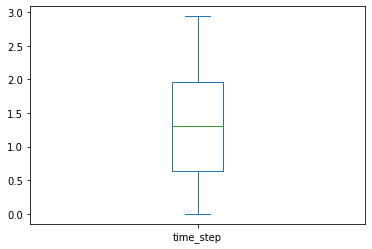

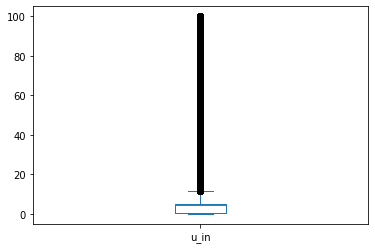

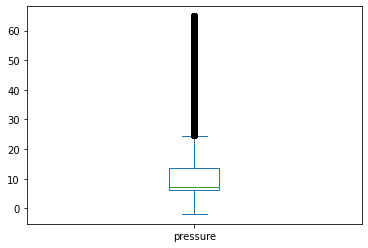

In [22]:
# box plots

for col in ['time_step', 'u_in', 'pressure']:
    train_df[col].plot(kind='box')
    plt.show()

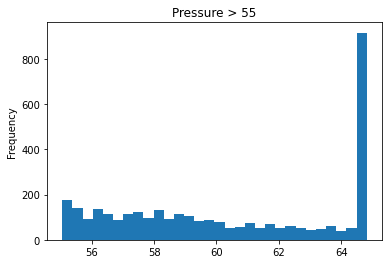

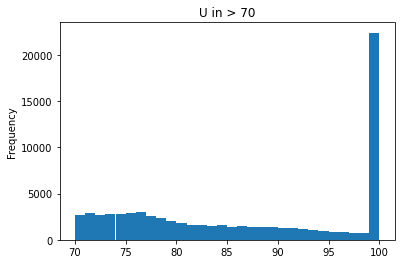

In [23]:
train_df[train_df['pressure'] > 55]['pressure'].plot(kind='hist', bins=30, title='Pressure > 55')
plt.show()
train_df[train_df['u_in'] > 70]['u_in'].plot(kind='hist', bins=30, title='U in > 70')
plt.show()

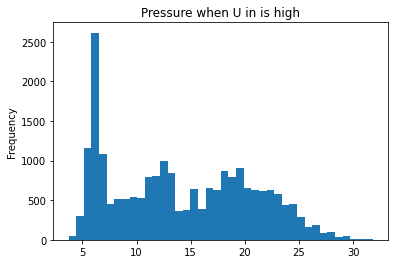

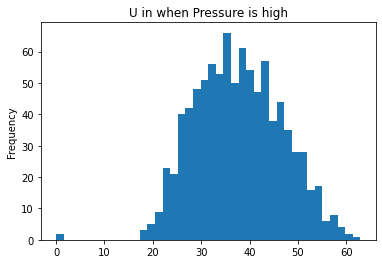

In [24]:
train_df[train_df['u_in'] > 99.98]['pressure'].plot(kind='hist', bins=40, title='Pressure when U in is high')
plt.show()
train_df[train_df['pressure'] > 64.5]['u_in'].plot(kind='hist', bins=40, title='U in when Pressure is high')
plt.show()

In [25]:
df_breath = train_df.groupby('breath_id', as_index=False).median()
df_breath

,breath_id,id,R,C,time_step,u_in,u_out,pressure
0,1,40.5,20.0,50.0,1.344639,4.922568,1.0,7.595045
1,2,120.5,20.0,20.0,1.343440,4.931040,1.0,6.997477
2,3,200.5,50.0,20.0,1.262727,4.885308,1.0,7.384139
3,4,280.5,50.0,50.0,1.264113,4.788770,1.0,7.243535
4,5,360.5,5.0,50.0,1.361266,4.940690,1.0,7.454441
...,...,...,...,...,...,...,...,...
75445,125740,6035640.5,50.0,50.0,1.359644,4.405561,1.0,6.540513
75446,125742,6035720.5,20.0,10.0,1.331251,2.980963,1.0,6.821722
75447,125743,6035800.5,20.0,10.0,1.332584,2.572122,1.0,6.399909
75448,125745,6035880.5,50.0,50.0,1.254379,4.886712,1.0,7.384139


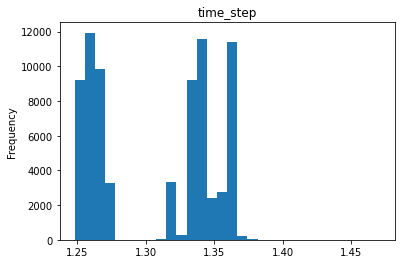

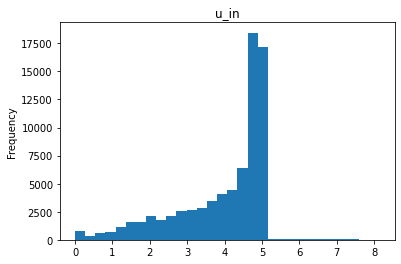

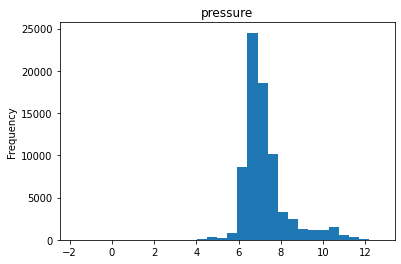

In [26]:
for col in ['time_step', 'u_in', 'pressure']:
    df_breath[col].plot(kind='hist', bins=30, title=col)
    plt.show()

In [27]:
df_breath[df_breath['pressure'] < 0].head(10)

,breath_id,id,R,C,time_step,u_in,u_out,pressure
359,542,28760.5,50.0,10.0,1.318858,0.749655,1.0,-1.403629
544,851,43560.5,50.0,10.0,1.318397,0.132459,1.0,-1.544234
6760,11216,540840.5,50.0,10.0,1.320016,0.000000,1.0,-0.419399
11564,19236,925160.5,50.0,10.0,1.319111,0.137447,1.0,-1.614536
12045,20075,963640.5,50.0,10.0,1.318981,0.805863,1.0,-0.173342
13313,22164,1065080.5,50.0,10.0,1.319179,0.116113,1.0,-1.473931
16716,27731,1337320.5,50.0,10.0,1.318718,0.000000,1.0,-0.208493
18124,30127,1449960.5,50.0,10.0,1.318120,0.138713,1.0,-0.841212
25956,43103,2076520.5,50.0,10.0,1.319760,0.344649,1.0,-1.438780
26643,44309,2131480.5,50.0,10.0,1.318243,0.102006,1.0,-0.911514


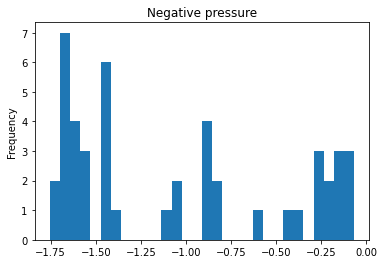

In [28]:
df_breath[df_breath['pressure'] < 0]['pressure'].plot(kind='hist', bins=30, title='Negative pressure')
plt.show()

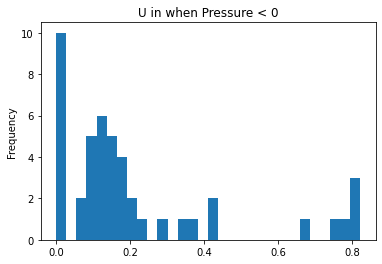

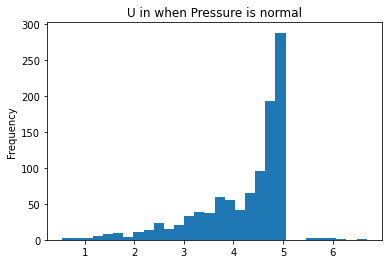

In [29]:
df_breath[df_breath['pressure'] < 0]['u_in'].plot(kind='hist', bins=30, title='U in when Pressure < 0')
plt.show()
df_breath[df_breath['pressure'] == df_breath['pressure'].median()]['u_in'].plot(
    kind='hist', bins=30, title='U in when Pressure is normal')
plt.show()

### Lets look at breathe processes. Take processes with normal, low and high pressures:

In [30]:
print('Some data where pressure is normal:')
display(df_breath[df_breath['pressure'] == train_df['pressure'].median()].sample(3, random_state=1))
print('\nSome data where pressure is below 0:')
display(df_breath[df_breath['pressure'] < 0].sample(3, random_state=1))
print('\nSome data where pressure is high:')
display(df_breath[df_breath['pressure'] > 12].sample(3, random_state=1))

Some data where pressure is normal:


,breath_id,id,R,C,time_step,u_in,u_out,pressure
29396,48945,2351720.5,20.0,20.0,1.344674,4.566269,1.0,7.032628
16953,28141,1356280.5,50.0,10.0,1.250903,3.628546,1.0,7.032628
65885,109737,5270840.5,50.0,20.0,1.261447,4.482881,1.0,7.032628



Some data where pressure is below 0:


,breath_id,id,R,C,time_step,u_in,u_out,pressure
58814,98041,4705160.5,50.0,10.0,1.319689,0.821494,1.0,-0.067889
70859,118131,5668760.5,50.0,10.0,1.320606,0.000000,1.0,-1.052119
6760,11216,540840.5,50.0,10.0,1.320016,0.000000,1.0,-0.419399



Some data where pressure is high:


,breath_id,id,R,C,time_step,u_in,u_out,pressure
62759,104581,5020760.5,5.0,50.0,1.268750,4.902565,1.0,12.129534
8695,14416,695640.5,5.0,50.0,1.270595,4.907272,1.0,12.059232
41634,69384,3330760.5,5.0,50.0,1.270216,4.908299,1.0,12.270138


In [31]:
print('Some data where pressure is normal:')
display(df_breath[df_breath['pressure'] == train_df['pressure'].median()].sample(3, random_state=1))
print('\nSome data where pressure is below 0:')
display(df_breath[df_breath['pressure'] < 0].sample(3, random_state=1))
print('\nSome data where pressure is high:')
display(df_breath[df_breath['pressure'] > 12].sample(3, random_state=1))

Some data where pressure is normal:


,breath_id,id,R,C,time_step,u_in,u_out,pressure
29396,48945,2351720.5,20.0,20.0,1.344674,4.566269,1.0,7.032628
16953,28141,1356280.5,50.0,10.0,1.250903,3.628546,1.0,7.032628
65885,109737,5270840.5,50.0,20.0,1.261447,4.482881,1.0,7.032628



Some data where pressure is below 0:


,breath_id,id,R,C,time_step,u_in,u_out,pressure
58814,98041,4705160.5,50.0,10.0,1.319689,0.821494,1.0,-0.067889
70859,118131,5668760.5,50.0,10.0,1.320606,0.000000,1.0,-1.052119
6760,11216,540840.5,50.0,10.0,1.320016,0.000000,1.0,-0.419399



Some data where pressure is high:


,breath_id,id,R,C,time_step,u_in,u_out,pressure
62759,104581,5020760.5,5.0,50.0,1.268750,4.902565,1.0,12.129534
8695,14416,695640.5,5.0,50.0,1.270595,4.907272,1.0,12.059232
41634,69384,3330760.5,5.0,50.0,1.270216,4.908299,1.0,12.270138


In [32]:
# function to visualize the process

def plot_create(x, y):
    plt.plot(x, y, '-', label=y.name)

def process_visualisation(df, breath_id):
    plt.figure(figsize=(14, 6))
    plt.title('Breath Id - {}'.format(breath_id))
    plot_create(df[df['breath_id'] == breath_id]['time_step'],
                df[df['breath_id'] == breath_id]['pressure'])
    plot_create(df[df['breath_id'] == breath_id]['time_step'],
                df[df['breath_id'] == breath_id]['u_in'])
    plot_create(df[df['breath_id'] == breath_id]['time_step'],
                df[df['breath_id'] == breath_id]['u_out'])
    plt.grid()
    plt.legend()
    plt.ylabel('Value')
    plt.show()

Process visualisation where pressure is normal:


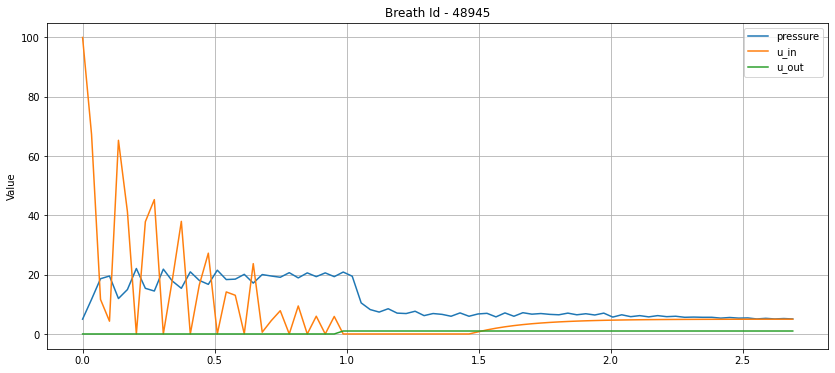

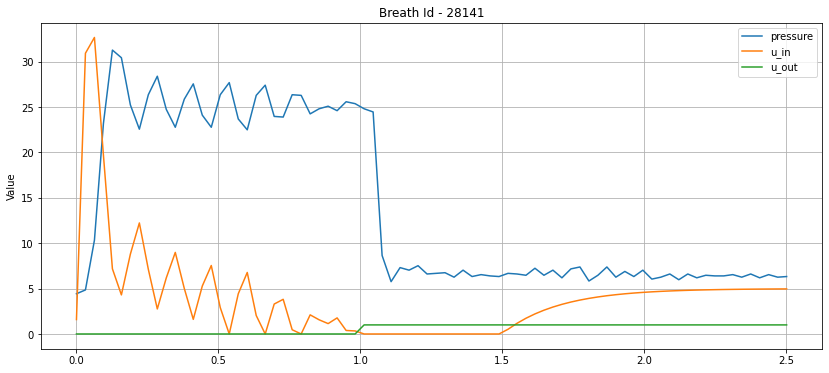

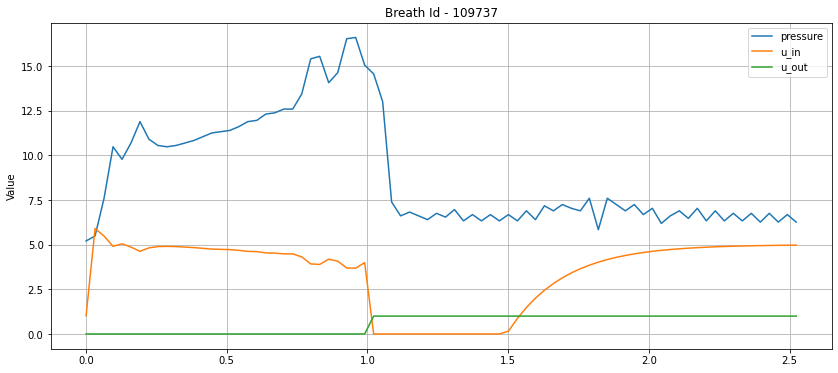

In [33]:
print('Process visualisation where pressure is normal:')
process_visualisation(train_df, 48945)
process_visualisation(train_df, 28141)
process_visualisation(train_df, 109737)

Process visualisation where pressure is below 0:


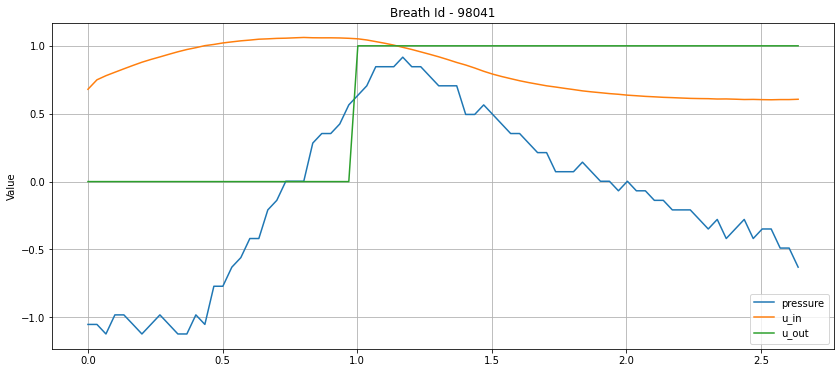

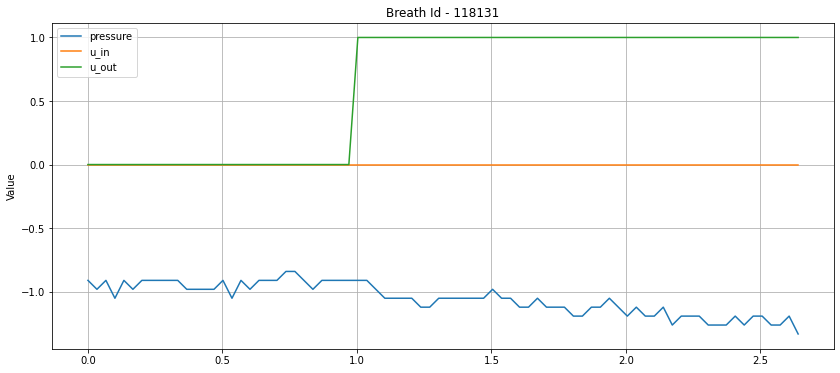

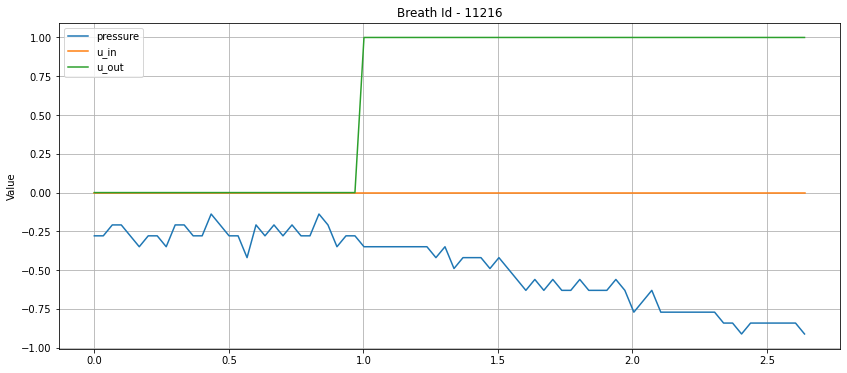

In [34]:
print('Process visualisation where pressure is below 0:')
process_visualisation(train_df, 98041)
process_visualisation(train_df, 118131)
process_visualisation(train_df, 11216)

Process visualisation where pressure is high:


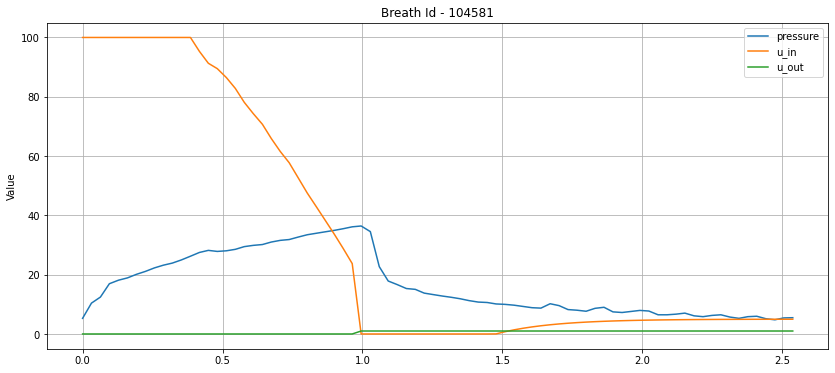

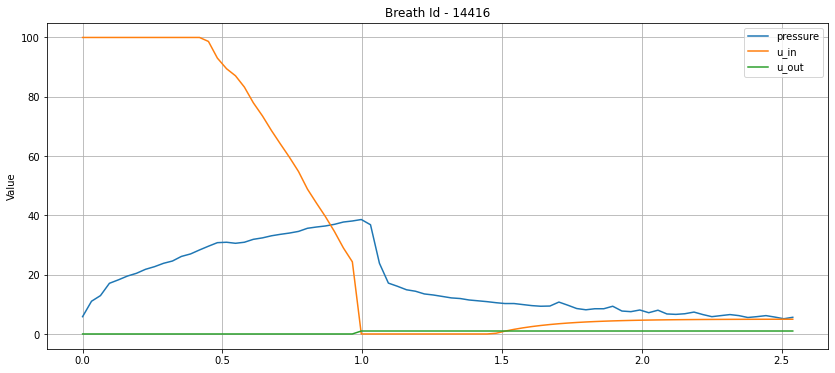

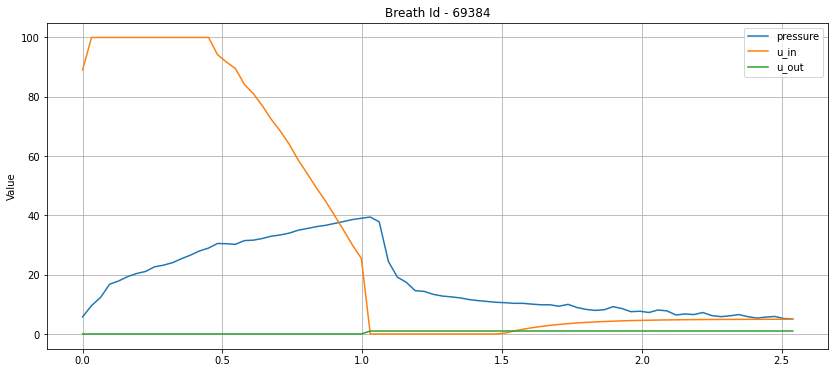

In [35]:
print('Process visualisation where pressure is high:')
process_visualisation(train_df, 104581)
process_visualisation(train_df, 14416)
process_visualisation(train_df, 69384)

## Train and Test

In [36]:
# function to create more features

def add_features(df):
    df['u_in_cumsum'] = df['u_in'].groupby(df['breath_id']).cumsum()
    df['u_in_lag_1'] = df.groupby('breath_id')['u_in'].shift(1)
    df['u_in_lag_2'] = df.groupby('breath_id')['u_in'].shift(2)
    df['u_in_lag_3'] = df.groupby('breath_id')['u_in'].shift(3)
    df['u_in_rolling_mean_3'] = df.groupby('breath_id')['u_in'].shift().rolling(3).mean()
    df['u_in_rolling_mean_5'] = df.groupby('breath_id')['u_in'].shift().rolling(5).mean()
    df['u_in_begin'] = df.groupby('breath_id')['u_in'].transform('first')
    df['u_in_end'] = df.groupby('breath_id')['u_in'].transform('last')
    df['u_in_min'] = df.groupby('breath_id')['u_in'].transform('min')
    df['u_in_max'] = df.groupby('breath_id')['u_in'].transform('max')
    df['u_in_median'] = df.groupby('breath_id')['u_in'].transform('median')
    df = df.fillna(0)
    df = df.drop(['breath_id', 'u_in', 'u_out'], axis=1)
    return df

In [37]:
# creating X and Y

X = train_df.copy()
X = X.drop('pressure', axis=1)
X = add_features(X)
y = train_df['pressure']

In [39]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 1.3 MB/s 


In [40]:
# Importing libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor

In [41]:
# train test split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=555)

In [42]:
# function to train and score the models based on mean absolute error

def train_and_score(model):
    model.fit(X_train, y_train)
    return mean_absolute_error(y_valid, model.predict(X_valid))

In [43]:
# creating model objects

linear_model = LinearRegression()
tree_model = DecisionTreeRegressor(max_depth=15, random_state=555)
cb_model = CatBoostRegressor(
    depth=15, loss_function='MAE', task_type='GPU', devices='0-3',
    gpu_ram_part=0.3, random_seed=555, verbose=0
)

### Must remember to use GPU Accelerator else CatBoost will not work

In [44]:
# training and scoring the models

display(
    pd.DataFrame(data=([train_and_score(linear_model)],
                       [train_and_score(tree_model)],
                       [train_and_score(cb_model)]),
                 columns=['Result MAE'],
                 index=['Linear', 'Tree', 'CatBoost'])
)

,Result MAE
Linear,3.943035
Tree,0.528331
CatBoost,0.442101


### As CatBoost scored the lowest MAE, we will use CatBoost to predict y on test data

In [45]:
# creating a test dataframe

test_df = pd.read_csv('/content/test.csv')
test_df

,id,breath_id,R,C,time_step,u_in,u_out
0,1,0,5,20,0.000000,0.000000,0
1,2,0,5,20,0.031904,7.515046,0
2,3,0,5,20,0.063827,14.651675,0
3,4,0,5,20,0.095751,21.230610,0
4,5,0,5,20,0.127644,26.320956,0
...,...,...,...,...,...,...,...
4023995,4023996,125748,20,10,2.530117,4.971245,1
4023996,4023997,125748,20,10,2.563853,4.975709,1
4023997,4023998,125748,20,10,2.597475,4.979468,1
4023998,4023999,125748,20,10,2.631134,4.982648,1


In [46]:
X = test_df.copy()
X = add_features(X)

In [47]:
# predicting y

y_pred = cb_model.predict(X)

In [48]:
# saving the output file according to the kaggel submission format

output = pd.DataFrame({'id': test_df['id'].values,
                       'pressure': y_pred})
display(output)
output.to_csv('submission.csv', index=False)

,id,pressure
0,1,6.503145
1,2,6.200917
2,3,7.320123
3,4,7.945949
4,5,9.338816
...,...,...
4023995,4023996,6.228596
4023996,4023997,6.238788
4023997,4023998,6.234434
4023998,4023999,6.224898


## I have scored 0.7300 MEA on the Kaggle submission

